<a href="https://colab.research.google.com/github/shayankhanani/ml-and-dl-projects/blob/main/Breast_Cancer_Prediction_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preprocessing

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/datasets/breast-cancer-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##Exploratory Data Analysis

In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.select_dtypes(include="object").columns

Index(['diagnosis'], dtype='object')

In [6]:
df.select_dtypes(include=["float64","int64"]).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Checking Missing Values

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().values.sum()

569

In [10]:
df.columns[df.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [11]:
df.drop(columns="Unnamed: 32", inplace = True)

In [12]:
df.isnull().values.any()

False

## Handling Categorical Variables

In [13]:
df.select_dtypes(include="object").columns

Index(['diagnosis'], dtype='object')

In [14]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [15]:
# Implementing One Hot encoding
df = pd.get_dummies(data=df,drop_first=True)

In [16]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Visualizing diagnosis_M using Countplot

In [17]:
df["diagnosis_M"].value_counts()


0    357
1    212
Name: diagnosis_M, dtype: int64

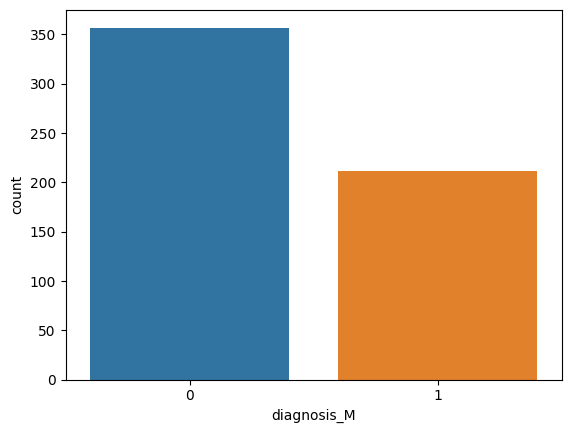

In [18]:
ax = sns.countplot(data=df, x='diagnosis_M')
plt.show()

## Correlation Matrix and Heat Map

In [19]:
df_2 = df.drop(columns="diagnosis_M")
df_2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


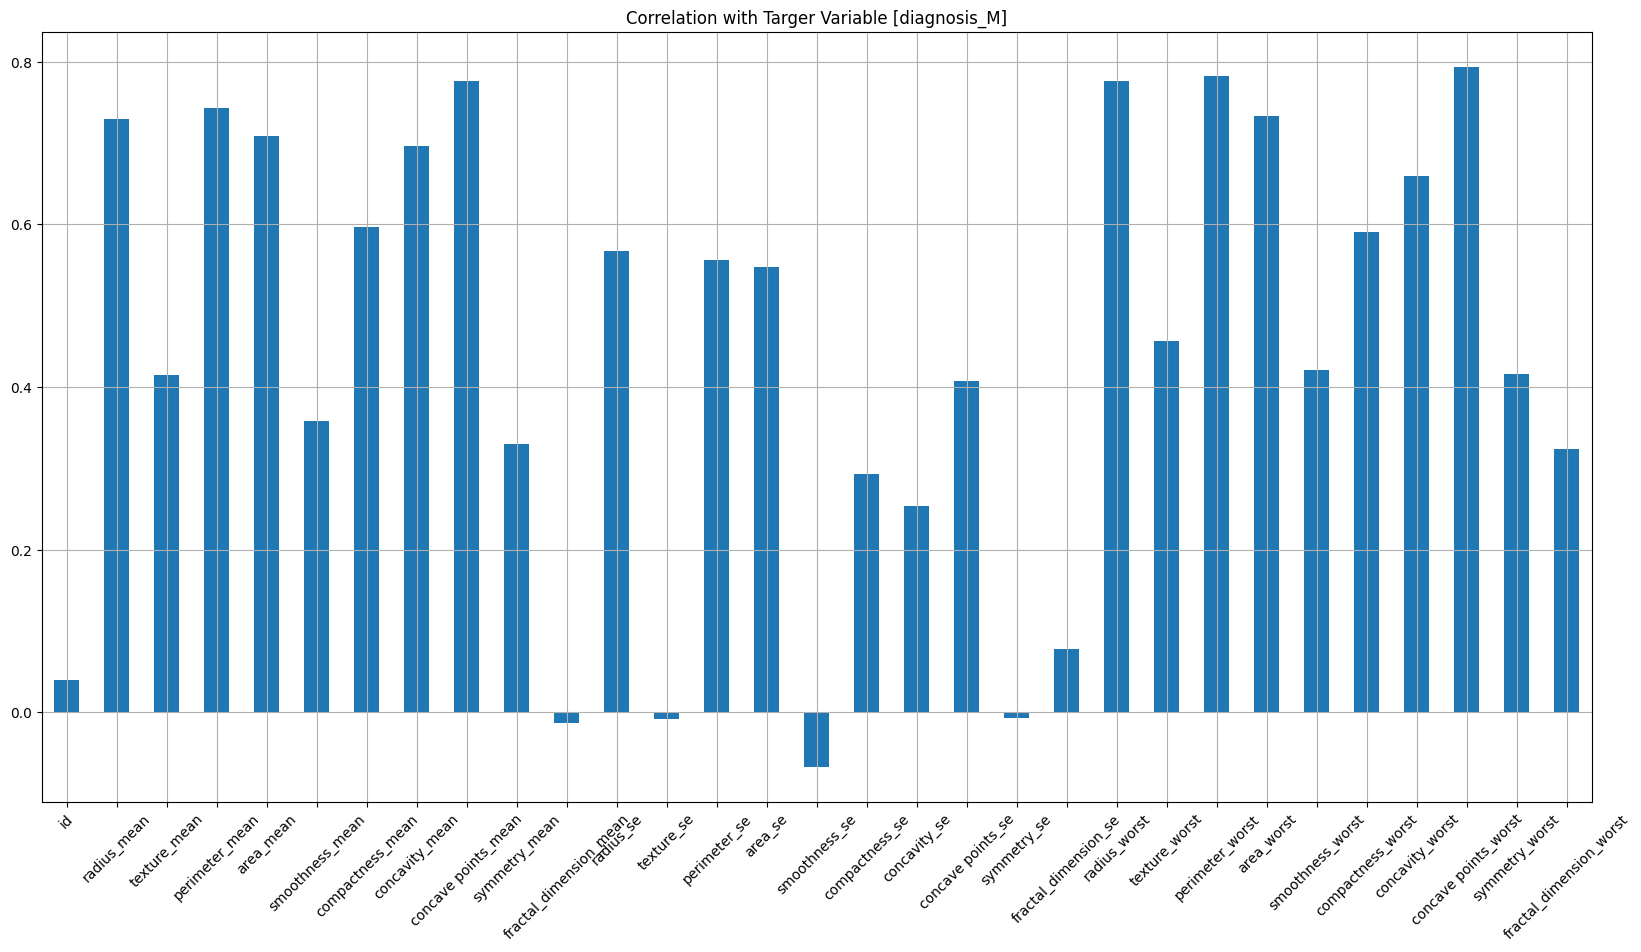

In [20]:
df_2.corrwith(df["diagnosis_M"]).plot.bar(
    figsize =(20,10),
    title = "Correlation with Targer Variable [diagnosis_M]",
    rot = 45,
    grid = True
);

In [21]:
corr = df.corr()

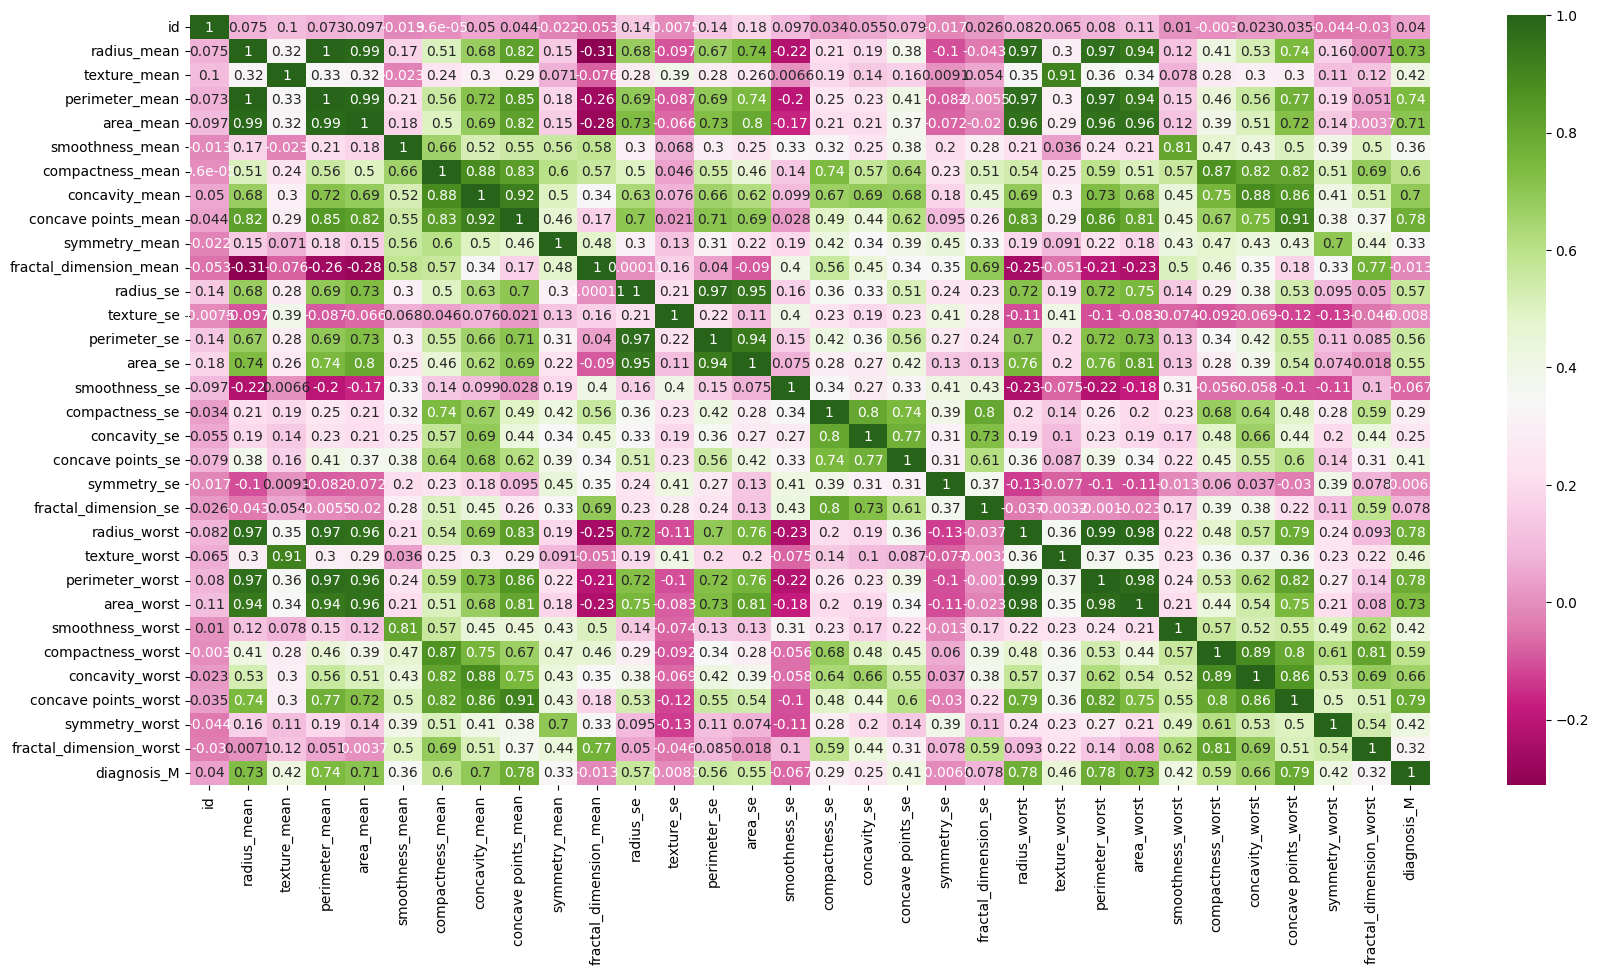

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="PiYG");

## Splitting the dataset into train and test sets

In [23]:
X = df.iloc[:,1:-1].values
X.shape

(569, 30)

In [24]:
y = df.iloc[:,-1].values
y.shape

(569,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set shapes: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shapes: X_test {X_test.shape}, y_train {y_test.shape}")

Train set shapes: X_train (455, 30), y_train (455,)
Test set shapes: X_test (114, 30), y_train (114,)


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2: Modeling

## 1. Logistic Regreesion

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model_lr = LogisticRegression(random_state=0)

In [31]:
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred = model_lr.predict(X_test)

### Model Evaluation

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [34]:
acc_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)

In [35]:
model_lr_eval_df = pd.DataFrame(
    [["Logistic Regression", acc_score, f1_score, prec_score, rec_score]],
    columns = ["Model", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"])

In [36]:
model_lr_eval_df

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.973684,0.964706,0.97619,0.953488


In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  1],
       [ 2, 41]])

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

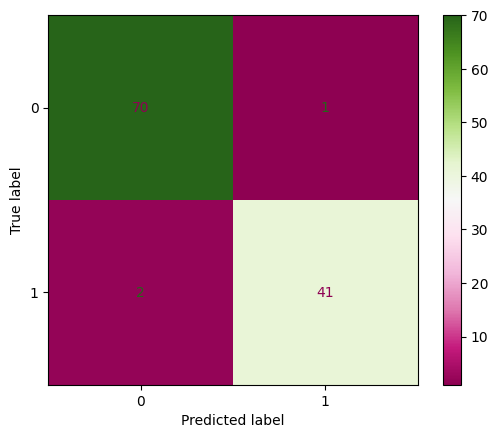

In [39]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model_lr.classes_,
    )
disp.plot(cmap="PiYG")
plt.show();

### Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
accuracies = cross_val_score(estimator=model_lr, X=X_train, y=y_train, cv=10)

In [42]:
print(f"Accuracy is {round((accuracies.mean()* 100),2)}%")
print(f"Standard Deviation is {round((accuracies.std()* 100),2)}%")

Accuracy is 97.36%
Standard Deviation is 1.93%


## 2. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_rfc =  RandomForestClassifier(random_state=0)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
y_pred = model_rfc.predict(X_test)

### Model Evaluation

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [47]:
acc_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)

In [48]:
model_rfc_eval_df = pd.DataFrame(
    [["Random Forest", acc_score, f1_score, prec_score, rec_score]],
    columns = ["Model", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"])

In [49]:
model_rfc_eval_df.head()

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Random Forest,0.964912,0.952381,0.97561,0.930233


In [50]:
model_eval = pd.DataFrame(
    columns = ["Model", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
    )
model_eval = pd.concat([model_lr_eval_df, model_rfc_eval_df], ignore_index=True)

In [51]:
model_eval.head()

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.973684,0.964706,0.97619,0.953488
1,Random Forest,0.964912,0.952381,0.97561,0.930233


In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  1],
       [ 3, 40]])

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

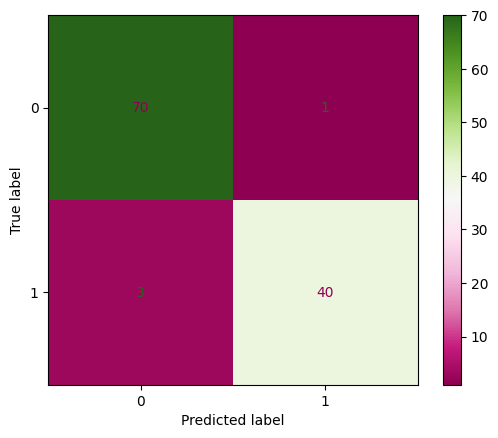

In [54]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model_rfc.classes_,
    )
disp.plot(cmap="PiYG")
plt.show();

### Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
accuracies = cross_val_score(estimator=model_rfc, X=X_train, y=y_train, cv=10)

In [57]:
print(f"Accuracy is {round((accuracies.mean()* 100),2)}%")
print(f"Standard Deviation is {round((accuracies.std()* 100),2)}%")

Accuracy is 96.04%
Standard Deviation is 2.94%


In [58]:
sdf

NameError: ignored

# Part 3: Hyperparameter Tuning

## Randomized Search to find the best parameters (Logistic Regression)

In [59]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning

In [60]:
## parameters to be test
params = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

In [61]:
random_search = RandomizedSearchCV(
    estimator=model_lr,
    param_distributions=params,
    n_iter=5,
    scoring="roc_auc",
    n_jobs = -1,
    cv= 5,
    verbose = 3,
    )

In [62]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [63]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.5}

In [64]:
random_search.best_estimator_

LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='saga')

In [65]:
random_search.best_score_

0.992981162106816

# Part 4: Final Model (Logistic Regression)

In [66]:
model = LogisticRegression(solver='saga', penalty='l1', C = 0.5, random_state=0)

In [67]:
model.fit(X_train, y_train)

LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='saga')

In [68]:
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)

model_df = pd.DataFrame(
    [["Logistic Regression Final", acc_score, f1_score, prec_score, rec_score]],
    columns = ["Model", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"])

model_eval = pd.concat([model_eval, model_df], ignore_index=True)

In [70]:
model_eval

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.973684,0.964706,0.97619,0.953488
1,Random Forest,0.964912,0.952381,0.97561,0.930233
2,Logistic Regression Final,0.973684,0.964706,0.97619,0.953488


### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

In [73]:
print(f"Accuracy is {round((accuracies.mean()* 100),2)}%")
print(f"Standard Deviation is {round((accuracies.std()* 100),2)}%")

Accuracy is 97.35%
Standard Deviation is 2.59%
